In [1]:
import json
import pandas as pd
import numpy as np
from itertools import chain
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
sns.set_theme()

In [2]:
def get_data(exp_path):
    chromos = []
    with open(exp_path, "r") as f:
        results = json.load(f)
        for fitness, chromo in zip(results["pop_vals"], results["chromos"]):
            c = list(chain.from_iterable(chromo[1]))
            c.append(fitness[1])
            chromos.append(c)
    columns = list(chain.from_iterable([[f"aug{i}", f"op{i}"] for i in range(1, 4)]))
    columns.append("test acc")
    columns
    df = pd.DataFrame(chromos, columns=columns)
    
    # create data in long format
    ops = set(list(df["aug1"]) + list(df["aug2"]) +  list(df["aug3"]))
    indexes = {op:i for i, op in enumerate(ops)}
    chromos_long = np.zeros([len(chromos), len(ops)+1])
    for i, c in enumerate(chromos):
        for aug, intensity in zip(c[:-2][::2], c[:-2][1::2]):
            chromos_long[i][indexes[aug]] = intensity
            chromos_long[i][-1] = c[-1]
    columns_long = list(ops) + ["fitness"]
    df_long = pd.DataFrame(chromos_long, columns = columns_long)
    return df, df_long, ops


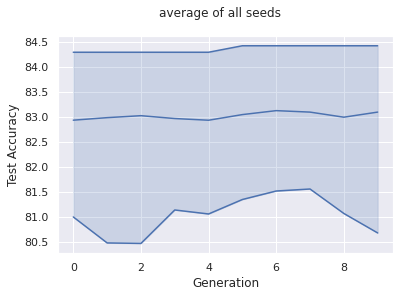

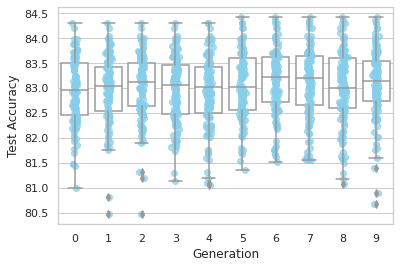

In [3]:
exp_dir = "/home/noah/ESSL/cc_experiments/models_figs6/opt/exp8_3"
seeds = glob.glob(os.path.join(exp_dir, "*"))
pop_vals = defaultdict(list)
total_data = []
for seed in seeds:
    with open(os.path.join(seed, "outcomes.json"), "r") as f:
        data = json.load(f)
    
    total_data+= data['pop_vals']
    for g, val in data['pop_vals']:
        pop_vals[g].append(val)
        
pop_vals = np.array(list(pop_vals.values())).transpose()
avg_vals = np.mean(pop_vals, axis=0)
max_vals = pop_vals.max(axis=0)
min_vals = pop_vals.min(axis=0)

plt.plot(range(len(avg_vals)), avg_vals, 'b-')
plt.plot(range(len(max_vals)), max_vals, 'b-')
plt.plot(range(len(min_vals)), min_vals, 'b-')
plt.fill_between(range(len(min_vals)),min_vals, max_vals, color='b',
                 alpha=0.2)
plt.xlabel("Generation")
plt.ylabel("Test Accuracy")
plt.xticks = range(len(max_vals))
plt.suptitle(f"average of all seeds")
plt.show()
# plt.savefig(os.path.join(plot_dir, f"min_max.png"))
plt.clf()

data = pd.DataFrame(total_data, columns = ["Generation", "Fitness"])
sns.set_style("whitegrid")
sns.boxplot(data=data, x="Generation", y="Fitness", color='white')
plt.ylabel("Test Accuracy")
# palette=mcp.gen_color(cmap='Paired',n=len(data["Generation"].unique()))
scatter_x = []
scatter_y = []
color = []

for i, row in data.iterrows():
    scatter_x.append(np.random.normal(row["Generation"], 0.04))
    scatter_y.append(row["Fitness"])
    plt.scatter(np.random.normal(row["Generation"], 0.04), row["Fitness"], alpha=0.7, color='skyblue')

plt.show()